<a href="https://colab.research.google.com/github/Aman-1701/Cancer_Winconsin/blob/main/Cancer_Wisconsin_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu

In [ ]:
!pip install ann_visualizer

In [ ]:
!pip install GPUtil

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(5,5))

# ----------------------------------------------
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#-----------------------------------------------
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout

#GPU DETAILS

In [72]:
import GPUtil
from tabulate import tabulate  

def Graphics_info():
    gpus=  GPUtil.getGPUs()
    list_gpus=[]
    for gpu in gpus:
        gpu_id = gpu.id
        gpu_name = gpu.name
        gpu_load = f"{gpu.load*100}%"
        gpu_free_memory = f"{gpu.memoryFree}MB"
        gpu_used_memory = f"{gpu.memoryUsed}MB"
        gpu_total_memory = f"{gpu.memoryTotal}MB"
        gpu_temperature = f"{gpu.temperature}`C"
        gpu_uuid = gpu.uuid
        list_gpus.append((gpu_id,gpu_name,gpu_load,gpu_free_memory,gpu_used_memory,gpu_total_memory,
                          gpu_temperature,gpu_uuid))
        
        return(str(tabulate(list_gpus,headers = ("ID","Name","Load","Free Memory","Used Memory",
                                                 "Total Memory","Temperature","UUID"),tablefmt="pretty")))
    
if __name__ == "__main__":
    print(Graphics_info())

+----+----------+------+-------------+-------------+--------------+-------------+------------------------------------------+
| ID |   Name   | Load | Free Memory | Used Memory | Total Memory | Temperature |                   UUID                   |
+----+----------+------+-------------+-------------+--------------+-------------+------------------------------------------+
| 0  | Tesla P4 | 0.0% |  7601.0MB   |   10.0MB    |   7611.0MB   |   34.0`C    | GPU-02fb5119-236c-95ed-6480-d58507cf40d4 |
+----+----------+------+-------------+-------------+--------------+-------------+------------------------------------------+


#DATA PREPROCESSING

In [84]:
df=pd.read_csv("/content/drive/My Drive/CANCER/data.csv")

In [85]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


PREPROCESSING

In [86]:
df.drop(['id'], axis = 1, inplace = True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Encoding


In [87]:
encode = LabelEncoder()
df['diagnosis'] = encode.fit_transform(df['diagnosis'])

In [88]:
features = list(df.columns[1:31])
len(features)

30

In [89]:
scaler = StandardScaler()

### Train Test Split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df['diagnosis'].values, test_size=0.15, random_state=0)

In [91]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 30, kernel_initializer = 'uniform', activation = 'relu', input_dim = 30))
classifier.add(Dropout(rate = 0.1))

# Adding the second hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(rate = 0.1))

# Adding the third hidden layer
classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(rate = 0.2))


# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 30)                930       
_________________________________________________________________
dropout_40 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_55 (Dense)             (None, 15)                465       
_________________________________________________________________
dropout_41 (Dropout)         (None, 15)                0         
_________________________________________________________________
dense_56 (Dense)             (None, 7)                 112       
_________________________________________________________________
dropout_42 (Dropout)         (None, 7)                 0         
_________________________________________________________________
dense_57 (Dense)             (None, 1)               

In [92]:
history=classifier.fit(scaler.fit_transform(X_train.values), np.array(y_train),batch_size = 4,epochs=50,validation_split=0.20)

Epoch 1/50
97/97 [==============================] - 1s 3ms/step - loss: 0.6798 - accuracy: 0.6374 - val_loss: 0.4491 - val_accuracy: 0.9278
Epoch 2/50
97/97 [==============================] - 0s 1ms/step - loss: 0.3422 - accuracy: 0.9048 - val_loss: 0.1052 - val_accuracy: 0.9897
Epoch 3/50
97/97 [==============================] - 0s 1ms/step - loss: 0.1094 - accuracy: 0.9787 - val_loss: 0.0599 - val_accuracy: 0.9794
Epoch 4/50
97/97 [==============================] - 0s 1ms/step - loss: 0.1321 - accuracy: 0.9379 - val_loss: 0.0498 - val_accuracy: 0.9794
Epoch 5/50
97/97 [==============================] - 0s 1ms/step - loss: 0.1037 - accuracy: 0.9670 - val_loss: 0.0446 - val_accuracy: 0.9794
Epoch 6/50
97/97 [==============================] - 0s 1ms/step - loss: 0.1072 - accuracy: 0.9755 - val_loss: 0.0366 - val_accuracy: 0.9794
Epoch 7/50
97/97 [==============================] - 0s 1ms/step - loss: 0.0542 - accuracy: 0.9874 - val_loss: 0.0324 - val_accuracy: 0.9794
Epoch 8/50
97/97 [==

In [93]:
y_prediction = classifier.predict_classes(scaler.transform(X_test.values))


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


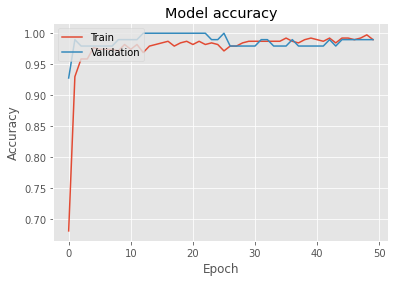

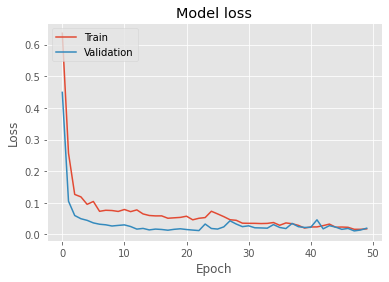

In [94]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Accuracy: 98.83720930232558%


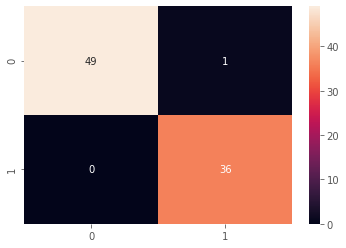

In [95]:
#print(len(y_test),len(y_prediction))
cm = confusion_matrix(y_test, y_prediction)
tn, fn, fp, tp=confusion_matrix(y_prediction,y_test).ravel()


accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print("Accuracy: "+ str(accuracy*100)+"%")
sns.heatmap(cm, annot=True)
plt.savefig('h.png')
plt.show()

In [96]:
precision, recall,fscore, support =  precision_recall_fscore_support(y_test, y_prediction, average=None)

print('True Negative', tn)
print('False Positive', fp)
print('False Negative', fn)
print('True Positive', tp)

total = tn + tp + fn + fp

print('Test Accuracy : ', (tn + tp)/total)
print('Misclassification Rate : ', (fn + fp)/total)
print('precision : ', precision)
print('recall : ', recall)
print('FScore : ', fscore)
print('Support : ', support)
print('Sensitivity or TPR : ', (tp/ (tp + fn)) )
print('Specificity or TNR : ', (tn/(tn+fp)))
print('False Positive Rate or Fallout : ', (fp/(fp+tn)))
print('False Negative Rate : ', (fn/(fn+tp)))

print('False Discovery Rate : ', (fp/(tp+fp)))

True Negative 49
False Positive 1
False Negative 0
True Positive 36
Test Accuracy :  0.9883720930232558
Misclassification Rate :  0.011627906976744186
precision :  [1.         0.97297297]
recall :  [0.98 1.  ]
FScore :  [0.98989899 0.98630137]
Support :  [50 36]
Sensitivity or TPR :  1.0
Specificity or TNR :  0.98
False Positive Rate or Fallout :  0.02
False Negative Rate :  0.0
False Discovery Rate :  0.02702702702702703


In [97]:
from ann_visualizer.visualize import ann_viz;



In [ ]:
ann_viz(classifier, title="Neural Network")